# COGS 108 - Final Project

# Names

- Shawn Oh
- Jesse Liang
- Jared Thach
- Kenzie Nguyen

# Table of Contents

- Overview
- Research Question
- Hypothesis
- Background and Prior Work
- Dataset(s)
- 1) Importing Libraries and Reading in Data
    - Economic freedom dataset
    - GDP per capita dataset
- 2) Data Cleaning
    - General table manipulation
    - Merging datasets
    - Dropping null values and imputing
    - Converting types
- 3) Exploratory Data Analysis (EDA)
    - 2018 EFSI by country
    - Pair scatterplots
    - Temporal persepective of GDP pc vs. Economic Freedom Factors
- 4) Analysis
    - Finding correlated features to GDP per capita
    - Baseline machine learning model
    - Optimized machine learning model
    - Performance Evaluation
- 5) Conclusion and Discussion
    - Limitations
- Privacy/Ethics Considerations

# Overview

In this project, we attempt to predict the gross domestic product per capita (GDPpc) of various countries around the world using Fraser Institute’s economic freedom dataset. Prior to our analysis, we cleaned and explored our dataset. Afterwards, we found the top 10 the most strongly correlated features to our target variable, GDP, and constructed multiple linear regression models to see which combination of these 10 features resulted in the best performance. Our baseline model with all 10 of these features had an root mean squared error **(RMSE) of 10073.3** while our best model which found the best combination of 5 features (impartial courts, integrity of the legal system, reliability of police, business regulations, and legal enforcement of contracts) had an **RMSE of 9993.9**. 

<a id='research_question'></a>
# Research Question

* Which freedom factors are most critical in predicting economic productivity?
    - We will measure economic productivity through **GDP per capita**.
    - Freedom factors include freedom to trade internationally, reliablity of police, etc.

# Hypothesis

Our hypothesis is that we may indeed be able to find several strongly correlated features to GDP per capita (GDPpc) and because of their strong correlation to our target variable, GDPpc, we will be able to closely predict GDPpc for our testing set.

# Background and Prior Work
The world has changed in previously unimaginable ways over just the past decade. In acknowledging and attempting to look beyond that, it then becomes clear just how unfathomable the nature of the world's history really is. That however does not mean it cannot be learned from, and this very sentiment is what is really at the core of this project. Our aim is to better understand the trends that played out over the past 50 years by analyzing summary statistics regarding their productivity and the circumstances surrounding that. 

For our research, we have also analyzed another dataset that we have decided to not include. This data was Long Term Productivity Data, which provides summary statistics about various countries' economic outputs. We decided against using this dataset because it focuses on a small number of countries, as opposed to our current World Bank data that includes all countries.

**References**
- 1) **Long Term Productivity Database (Related Articles):**
http://longtermproductivity.com/post.html

# Dataset(s)

1) **Fraser Institute - Economic Freedom (Approach):**
- Dataset Name: Economic Freedom Rankings
    - **Note: There are gonna be A LOT of these (47 aside from the one I played with to be exact if I'm counting right)**
- Link: https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&year=2018&page=dataset&min-year=2&max-year=0&filter=0
- Number of observations: 164

- Description: This dataset provides ranking for a number of quantifiable aspects relevant to countries' economies

2) **The World Bank Database (Data)**
- Dataset names
    - GDP per capita (current US$) - Observations: 265
- Links: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

- Description: This dataset provides summary statistics about various countries' economic outputs


- The Economic Freedom Rankings datasets can be combined with themselves in multiple ways, such as...
    - 1. All together to get an average
    - 2. Combined on significant time periods
    - 3. Used together to show how values change(d) from year to year

- The Longterm Productivity dataset could be combined with the Economic Freedom Rankings to get everything in one
    - **Note:** There are very few countries present in this dataset relative to the Economic Freedom Rankings


# 1. Importing Libraries and Reading in Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import preprocessing

# https://stackoverflow.com/questions/49188960/how-to-show-all-of-columns-name-on-pandas-dataframe
pd.set_option('display.max_columns', None)

### Reading in the full version of the Economic Freedom Rankings Dataset

In [2]:
# https://stackoverflow.com/questions/37400974/unicode-error-unicodeescape-codec-cant-decode-bytes-in-position-2-3-trunca
# ^^ Shift + right clicked to get the file path, wasn't working so I looked up the error and found the link above

# The full version of the 'Economic Freedom Rankings' dataset will be read in as efr for now
efr = pd.read_excel(pd.ExcelFile(r".\data\Economic_Freedom_Rankings.xlsx"), 'EFW Data 2020 Report')
efr.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Area 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Area 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Area 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Area 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Area 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1A,NaN,1B,NaN,1C,NaN,1D,NaN,NaN,NaN,NaN,1E,NaN,2A,2B,2C,2D,2E,2F,2G,2H,NaN,NaN,3A,NaN,3B,NaN,3C,NaN,3D,NaN,4A,NaN,NaN,NaN,NaN,NaN,NaN,4B,NaN,NaN,4C,4D,NaN,NaN,NaN,NaN,5A,NaN,NaN,NaN,5B,NaN,NaN,NaN,NaN,NaN,NaN,5C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1Di,NaN,1Dii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4Ai,NaN,4Aii,NaN,4Aiii,NaN,NaN,4Bi,4Bii,NaN,NaN,4Di,4Dii,4Diii,NaN,NaN,5Ai,5Aii,5Aiii,NaN,5Bi,5Bii,5Biii,5Biv,5Bv,5Bvi,NaN,5Ci,5Cii,5Ciii,5Civ,5Cv,5Cvi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Government consumption,data,Transfers and subsidies,data,Government investment,data,Top marginal income tax rate,data,Top marginal income and payroll tax rate,data,Top marginal tax rate,State ownership of assets,Size of Government,Judicial independence,Impartial courts,Protection of property rights,Military interference in rule of law and politics,Integrity of the legal system,Legal enforcement of contracts,Regulatory restrictions on the sale of real pr...,Reliability of police,Gender Legal Rights Adjustment,Legal System & Property Rights,Money growth,data,Standard deviation of inflation,data,Inflation: Most recent year,data,Freedom to own foreign currency bank accounts,Sound Money,Revenue from trade taxes (% of trade sector),data,Mean tariff rate,data,Standard deviation of tariff rates,data,Tariffs,Non-tariff trade barriers,Compliance costs of importing and exporting,Regulatory trade barriers,Black market exchange rates,Financial Openness,Capital controls,Freedom of foreigners to visit,Controls of the movement of capital and people,Freedom to Trade Internationally,Ownership of banks,Private sector credit,Interest rate controls/negative real interest ...,Credit market regulations,Hiring regulations and minimum wage,Hiring and firing regulations,Centralized collective bargaining,Hours Regulations,Mandated cost of worker dismissal,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Impartial Public Administration,Licensing restrictions,Tax compliance,Business regulations,Regulation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2018,ALB,Albania,7.8,26,1,8.15588,12.27,6.73842,12.47,7.99542,22.016,9,23,7,34,8,9.538,8.08554,3.56479,3.65162,4.93526,8.3,5.70793,3.91351,6.71538,5.60784,0.9524,5.17341,9.95723,-0.213826,9.73833,0.654182,9.5944,2.028,10,9.82249,9.66667,0.5,9.28,3.6,8.0992,4.752,9.01529,6.80731,9.40533,8.10632,10,4.16442,4.61538,8.29692,5.69224,8.20346,10,9.21488,10,9.73829,5.56667,4.86538,5.57578,8,6.29974,10,6.71793,

### Reading GDP per capita for all countries
- Looking at it & getting information before cleaning it as well

In [3]:
gdppc_data = pd.read_csv('.\data\GDPpc.csv')
gdppc_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6472.502029,7885.796545,9764.789979,11392.455810,12307.311740,13496.003140,14046.503760,14936.827220,16241.046520,16439.356360,16586.068440,17927.749640,19078.343190,19356.203390,20620.700630,20669.031970,20436.887130,20833.761610,22569.974990,23300.039560,24045.272480,25835.132670,27084.703690,24630.453710,23512.602600,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,129.329713,156.518939,159.567578,135.317308,143.14465,173.653765,186.510897,197.445508,224.224797,247.354106,275.738198,272.655286,264.111317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.426611,190.683814,211.382117,242.031285,263.733692,359.693238,364.660745,438.076034,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710.981648,642.383858,619.961357,623.440585,637.715231,758.237576,685.270085,756.261853,792.303120,890.554137,947.704182,865.692730,656.361756,441.200673,328.673295,397.179451,522.643807,514.295223,423.593660,387.784316,556.836318,527.333529,872.494492,982.960899,1255.564045,1902.422346,2599.566464,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,639.484736,639.865909,693.873475,674.793383,652.774321,697.995597,617.230435,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.540127,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.556850,3498.173652,4217.173581,5342.16856,6319.739034,7169.101006,7152.375134,7751.370216,9129.706185,11820.849390,12377.411650,10372.232830,9610.266308,8022.654781,7728.906695,7774.393829,10361.815980,12616.167570,14304.356960,15166.437850,18878.505970,19532.540150,20547.711790,16516.471030,16234.809010,18461.064860,19017.174590,18353.059720,18894.521500,19261.710500,21854.246800,22971.535540,25066.882210,32271.963900,37969.174990,40066.256920,42675.812760,47803.693610,48718.496870,43503.185520,40852.666780,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260,40886.391160,NaN


# 2. Data Cleaning

**Economic Freedom Dataset**
- Had to drop some rows and columns that were either unnecessary
- Renamed all the columns using a dictionary because we import from an Excel sheet
- We don't want to drop entire rows because a single value was missing, so we leave it in

**GDP per capita Dataset**
- Most tidy of them all.
- Had to manually edit the CSV because the first 4 rows were not part of the data


**Notes**
- Since we did not remove the NaN values, we need to be mindful of them.

### Cleaning the Economic Freedom dataset

In [4]:
# Remove empty columns 

cols = [0,73,74,75,76,77,78,79]
efr.drop(efr.columns[cols],axis=1,inplace=True)

In [5]:
column_names_series = efr[efr['Unnamed: 1'] == 'Year']
column_names_series

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
3,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Government consumption,data,Transfers and subsidies,data,Government investment,data,Top marginal income tax rate,data,Top marginal income and payroll tax rate,data,Top marginal tax rate,State ownership of assets,Size of Government,Judicial independence,Impartial courts,Protection of property rights,Military interference in rule of law and politics,Integrity of the legal system,Legal enforcement of contracts,Regulatory restrictions on the sale of real pr...,Reliability of police,Gender Legal Rights Adjustment,Legal System & Property Rights,Money growth,data,Standard deviation of inflation,data,Inflation: Most recent year,data,Freedom to own foreign currency bank accounts,Sound Money,Revenue from trade taxes (% of trade sector),data,Mean tariff rate,data,Standard deviation of tariff rates,data,Tariffs,Non-tariff trade barriers,Compliance costs of importing and exporting,Regulatory trade barriers,Black market exchange rates,Financial Openness,Capital controls,Freedom of foreigners to visit,Controls of the movement of capital and people,Freedom to Trade Internationally,Ownership of banks,Private sector credit,Interest rate controls/negative real interest ...,Credit market regulations,Hiring regulations and minimum wage,Hiring and firing regulations,Centralized collective bargaining,Hours Regulations,Mandated cost of worker dismissal,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Impartial Public Administration,Licensing restrictions,Tax compliance,Business regulations,Regulation


In [6]:
# Extract column names

column_names = column_names_series.values[0]

efr_columnsDict = {}

for i in range(len(efr.columns)):
    efr_columnsDict[efr.columns[i]] = column_names[i].strip().replace(" ", "_")
    
efr = efr.rename(columns=efr_columnsDict)
efr = efr.rename(columns={'Countries': 'Country'})

In [7]:
# Dropping the first 4 rows and last row because they only contained information that's now in the column names themselves

efr.drop(efr.head(4).index,inplace=True)
efr.drop(efr.tail(1).index,inplace=True)


In [8]:
# Resetting the indices since the first 3 rows were dropped

efr = efr.reset_index()

In [9]:
# Remove unnecessary columns

efr = efr.drop(['Rank', 'Quartile', 'index', 'data'], axis=1)

In [10]:
# There is one column that contains non-numeric values

desired_col = 'Mandated_cost_of_worker_dismissal'
for index, row in efr.iterrows():
    val = row[desired_col]
    if isinstance(val, str):
        val = val.strip()
        if len(val) > 0 and val.isnumeric():
            efr.at[index, desired_col] = float(val)
        else:
            efr.at[index, desired_col] = np.nan
    else:
        efr.at[index, desired_col] = float(val)
    
    if not isinstance(efr.at[index, desired_col], float):
        print(type(efr.at[index, desired_col]), efr.at[index, desired_col])

In [11]:
# Final product of cleaning

efr.head()

,Year,ISO_Code,Country,Economic_Freedom_Summary_Index,Government_consumption,Transfers_and_subsidies,Government_investment,Top_marginal_income_tax_rate,Top_marginal_income_and_payroll_tax_rate,Top_marginal_tax_rate,State_ownership_of_assets,Size_of_Government,Judicial_independence,Impartial_courts,Protection_of_property_rights,Military_interference_in_rule_of_law_and_politics,Integrity_of_the_legal_system,Legal_enforcement_of_contracts,Regulatory_restrictions_on_the_sale_of_real_property,Reliability_of_police,Gender_Legal_Rights_Adjustment,Legal_System_&_Property_Rights,Money_growth,Standard_deviation_of_inflation,Inflation:_Most_recent_year,Freedom_to_own_foreign_currency_bank_accounts,Sound_Money,Revenue_from_trade_taxes_(%_of_trade_sector),Mean_tariff_rate,Standard_deviation_of_tariff_rates,Tariffs,Non-tariff_trade_barriers,Compliance_costs_of_importing_and_exporting,Regulatory_trade_barriers,Black_market_exchange_rates,Financial_Openness,Capital_controls,Freedom_of_foreigners_to_visit,Controls_of_the_movement_of_capital_and_people,Freedom_to_Trade_Internationally,Ownership_of_banks,Private_sector_credit,Interest_rate_controls/negative_real_interest_rates),Credit_market_regulations,Hiring_regulations_and_minimum_wage,Hiring_and_firing_regulations,Centralized_collective_bargaining,Hours_Regulations,Mandated_cost_of_worker_dismissal,Conscription,Labor_market_regulations,Administrative_requirements,Regulatory_Burden,Starting_a_business,Impartial_Public_Administration,Licensing_restrictions,Tax_compliance,Business_regulations,Regulation
0,2018,ALB,Albania,7.8,8.15588,6.73842,7.99542,9,7,8,9.538,8.08554,3.56479,3.65162,4.93526,8.3,5.70793,3.91351,6.71538,5.60784,0.9524,5.17341,9.95723,9.73833,9.5944,10,9.82249,9.66667,9.28,8.0992,9.01529,6.80731,9.40533,8.10632,10,4.16442,4.61538,8.29692,5.69224,8.20346,10,9.21488,10,9.73829,5.56667,4.86538,5.57578,8,6.29974,10,6.71793,5.65154,6.66667,9.74248,5.396,5.62194,7.17525,6.70898,7.72173
1,2018,DZA,Algeria,4.97,3.22059,7.81713,4.60682,7,2,4.5,1.064,4.24171,3.71071,4.10849,5.48731,4.2,4.69429,4.39209,6.62669,6.34741,0.8333,4.53364,9.59645,7.94407,9.14602,5,7.92163,8.48,6.22,5.9176,6.87253,4.55761,0.47929,2.51845,0,1.65726,0,1.10626,0.921172,2.57804,0,5.30153,10,5.10051,5.56667,5.02806,6.52248,6,7.75518,3,5.6454,4.21515,2.44444,9.305,3.906,8.77111,7.02953,5.94521,5.5637
2,2018,AGO,Angola,4.75,7.69869,9.62398,6.32667,10,9,9.5,3.376,7.30507,3.16777,3.21812,4.17442,3.3,4.86742,2.3022,5.52162,3.80623,0.8095,3.43328,9.87349,2.981,5.96193,0,4.7041,9.24,8.16,4.4064,7.2688,4.69511,2.51479,3.60495,0,0,2.30769,0.110626,0.806106,2.91996,5,6.533,4,5.17767,10,4.42657,6.96978,4,6.63276,0,5.33819,2.93789,2.44444,8.73081,5.044,7.91642,6.78292,5.64275,5.3862
3,2018,ARG,Argentina,5.78,5.93824,6.3079,7.58645,7,1,4,6.408,6.04812,4.26882,4.25686,5.63363,7.5,4.78447,3.81644,6.8572,4.41154,0.7857,4.63489,5.66718,6.45312,3.14,5,5.06508,7.10667,7.28,5.92,6.76889,5.07069,5.64971,5.3602,10,7.59523,6.92308,7.96505,7.49445,7.40589,5,4.25946,8,5.75315,2.76667,2.24039,3.19298,10,2.51725,10,5.11955,2.71423,6.66667,9.57929,7.202,5.72652,6.50829,6.3995,5.7574
4,2018,ARM,Armenia,7.92,7.71765,7.71117,9.2966,5,5,5,9.51,7.84708,4.01406,4.88636,6.02488,5.8,5.44906,5.19669,9.81593,6.66986,1,5.98211,9.11017,9.61736,9.49595,10,9.55587,9.02667,8.7,7.582,8.43622,5.68975,9.31539,7.50257,10,8.34274,5.38462,10,7.90912,8.46198,10,8.63993,10,9.54664,6.66667,5.59964,7.24864,10,9.25173,0,6.46111,5.17041,6,9.86353,6.298,9.30257,7.04074,7.27921,7.76232


### Cleaning the GDP per capita dataset

In [12]:
gdppc_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6472.502029,7885.796545,9764.789979,11392.455810,12307.311740,13496.003140,14046.503760,14936.827220,16241.046520,16439.356360,16586.068440,17927.749640,19078.343190,19356.203390,20620.700630,20669.031970,20436.887130,20833.761610,22569.974990,23300.039560,24045.272480,25835.132670,27084.703690,24630.453710,23512.602600,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,129.329713,156.518939,159.567578,135.317308,143.14465,173.653765,186.510897,197.445508,224.224797,247.354106,275.738198,272.655286,264.111317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.426611,190.683814,211.382117,242.031285,263.733692,359.693238,364.660745,438.076034,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710.981648,642.383858,619.961357,623.440585,637.715231,758.237576,685.270085,756.261853,792.303120,890.554137,947.704182,865.692730,656.361756,441.200673,328.673295,397.179451,522.643807,514.295223,423.593660,387.784316,556.836318,527.333529,872.494492,982.960899,1255.564045,1902.422346,2599.566464,3121.995637,4080.941410,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,639.484736,639.865909,693.873475,674.793383,652.774321,697.995597,617.230435,336.586995,200.852220,367.279225,586.416340,750.604449,1009.977668,717.380567,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.540127,4114.140114,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.556850,3498.173652,4217.173581,5342.16856,6319.739034,7169.101006,7152.375134,7751.370216,9129.706185,11820.849390,12377.411650,10372.232830,9610.266308,8022.654781,7728.906695,7774.393829,10361.815980,12616.167570,14304.356960,15166.437850,18878.505970,19532.540150,20547.711790,16516.471030,16234.809010,18461.064860,19017.174590,18353.059720,18894.521500,19261.710500,21854.246800,22971.535540,25066.882210,32271.963900,37969.174990,40066.256920,42675.812760,47803.693610,48718.496870,43503.185520,40852.666780,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260,40886.391160,NaN


- There wasn't much to clean up here. We want to leave in the NaNs because we don't want to delete an entire year's data because of a few countries. We also do not want to delete an entire countries data.

### Combining our two datasets

In [13]:
# First creating `GDPpc` column with a temporary value of NaN

combined_data = efr.copy()
combined_data['GDPpc'] = np.nan

In [14]:
# Finally combine the GDP and GDPpc data with the EFSI dataframe

combined_data = combined_data.reset_index()
combined_data = combined_data.drop(['index'], axis=1)

for index, row in combined_data.iterrows():    
    gdppc_vals = gdppc_data[gdppc_data['Country Code'] == row['ISO_Code']][str(row['Year'])].values
    if len(gdppc_vals) != 0 and gdppc_vals[0] != np.nan:
        combined_data.at[index, 'GDPpc'] = float(gdppc_vals[0])

combined_data.head()

,Year,ISO_Code,Country,Economic_Freedom_Summary_Index,Government_consumption,Transfers_and_subsidies,Government_investment,Top_marginal_income_tax_rate,Top_marginal_income_and_payroll_tax_rate,Top_marginal_tax_rate,State_ownership_of_assets,Size_of_Government,Judicial_independence,Impartial_courts,Protection_of_property_rights,Military_interference_in_rule_of_law_and_politics,Integrity_of_the_legal_system,Legal_enforcement_of_contracts,Regulatory_restrictions_on_the_sale_of_real_property,Reliability_of_police,Gender_Legal_Rights_Adjustment,Legal_System_&_Property_Rights,Money_growth,Standard_deviation_of_inflation,Inflation:_Most_recent_year,Freedom_to_own_foreign_currency_bank_accounts,Sound_Money,Revenue_from_trade_taxes_(%_of_trade_sector),Mean_tariff_rate,Standard_deviation_of_tariff_rates,Tariffs,Non-tariff_trade_barriers,Compliance_costs_of_importing_and_exporting,Regulatory_trade_barriers,Black_market_exchange_rates,Financial_Openness,Capital_controls,Freedom_of_foreigners_to_visit,Controls_of_the_movement_of_capital_and_people,Freedom_to_Trade_Internationally,Ownership_of_banks,Private_sector_credit,Interest_rate_controls/negative_real_interest_rates),Credit_market_regulations,Hiring_regulations_and_minimum_wage,Hiring_and_firing_regulations,Centralized_collective_bargaining,Hours_Regulations,Mandated_cost_of_worker_dismissal,Conscription,Labor_market_regulations,Administrative_requirements,Regulatory_Burden,Starting_a_business,Impartial_Public_Administration,Licensing_restrictions,Tax_compliance,Business_regulations,Regulation,GDPpc
0,2018,ALB,Albania,7.8,8.15588,6.73842,7.99542,9,7,8,9.538,8.08554,3.56479,3.65162,4.93526,8.3,5.70793,3.91351,6.71538,5.60784,0.9524,5.17341,9.95723,9.73833,9.5944,10,9.82249,9.66667,9.28,8.0992,9.01529,6.80731,9.40533,8.10632,10,4.16442,4.61538,8.29692,5.69224,8.20346,10,9.21488,10,9.73829,5.56667,4.86538,5.57578,8,6.29974,10,6.71793,5.65154,6.66667,9.74248,5.396,5.62194,7.17525,6.70898,7.72173,5284.380184
1,2018,DZA,Algeria,4.97,3.22059,7.81713,4.60682,7,2,4.5,1.064,4.24171,3.71071,4.10849,5.48731,4.2,4.69429,4.39209,6.62669,6.34741,0.8333,4.53364,9.59645,7.94407,9.14602,5,7.92163,8.48,6.22,5.9176,6.87253,4.55761,0.47929,2.51845,0,1.65726,0,1.10626,0.921172,2.57804,0,5.30153,10,5.10051,5.56667,5.02806,6.52248,6,7.75518,3,5.6454,4.21515,2.44444,9.305,3.906,8.77111,7.02953,5.94521,5.5637,4153.733978
2,2018,AGO,Angola,4.75,7.69869,9.62398,6.32667,10,9,9.5,3.376,7.30507,3.16777,3.21812,4.17442,3.3,4.86742,2.3022,5.52162,3.80623,0.8095,3.43328,9.87349,2.981,5.96193,0,4.7041,9.24,8.16,4.4064,7.2688,4.69511,2.51479,3.60495,0,0,2.30769,0.110626,0.806106,2.91996,5,6.533,4,5.17767,10,4.42657,6.96978,4,6.63276,0,5.33819,2.93789,2.44444,8.73081,5.044,7.91642,6.78292,5.64275,5.3862,3289.646664
3,2018,ARG,Argentina,5.78,5.93824,6.3079,7.58645,7,1,4,6.408,6.04812,4.26882,4.25686,5.63363,7.5,4.78447,3.81644,6.8572,4.41154,0.7857,4.63489,5.66718,6.45312,3.14,5,5.06508,7.10667,7.28,5.92,6.76889,5.07069,5.64971,5.3602,10,7.59523,6.92308,7.96505,7.49445,7.40589,5,4.25946,8,5.75315,2.76667,2.24039,3.19298,10,2.51725,10,5.11955,2.71423,6.66667,9.57929,7.202,5.72652,6.50829,6.3995,5.7574,11633.498010
4,2018,ARM,Armenia,7.92,7.71765,7.71117,9.2966,5,5,5,9.51,7.84708,4.01406,4.88636,6.02488,5.8,5.44906,5.19669,9.81593,6.66986,1,5.98211,9.11017,9.61736,9.49595,10,9.55587,9.02667,8.7,7.582,8.43622,5.68975,9.31539,7.50257,10,8.34274,5.38462,10,7.90912,8.46198,10,8.63993,10,9.54664,6.66667,5.59964,7.24864,10,9.25173,0,6.46111,5.17041,6,9.86353,6.298,9.30257,7.04074,7.27921,7.76232,4220.490277


### Converting types

In [15]:
# Define a function to convert all objects to floats

def convert_float(string):
    try:
        return float(string)
    except:
        return string

combined_data = combined_data.applymap(convert_float)

### Dropping null values and imputing

- We want to avoid dropping all null values in our dataset because this would greatly render our dataset useless. Instead, we want to pinpoint areas where there are large amounts of null values and avoid those types of rows. The final product of our cleaning here will be used strictly for our linear regression model, however, the exploratory data analysis will continue to use `combined_data`, an uncleaned dataset.

In [16]:
# Viewing counts of null values

combined_data.isnull().sum().head(10)

Year                                           0
ISO_Code                                       0
Country                                        0
Economic_Freedom_Summary_Index               643
Government_consumption                       589
Transfers_and_subsidies                      933
Government_investment                        599
Top_marginal_income_tax_rate                1047
Top_marginal_income_and_payroll_tax_rate    1492
Top_marginal_tax_rate                       1047
dtype: int64

In [17]:
# Viewing number of null entries per year

temp = combined_data.copy()
null_entries = temp.isnull().sum(axis=1)
temp = temp.assign(**{'null_entries': null_entries})
temp.groupby('Year')['null_entries'].sum()

Year
1970.0    5842
1975.0    5240
1980.0    4929
1985.0    4777
1990.0    4172
1995.0    3421
2000.0    2271
2001.0    2233
2002.0    2139
2003.0    2008
2004.0    1699
2005.0    1117
2006.0    1070
2007.0    1051
2008.0    1050
2009.0    1024
2010.0     538
2011.0     451
2012.0     424
2013.0     259
2014.0     229
2015.0     245
2016.0     153
2017.0     154
2018.0     147
Name: null_entries, dtype: int64

- As we can see, most of our null values occur earlier in history and to a much larger scale than recent years, and therefore, we will drop all values prior to the year 2010. This cleaned dataset will strictly be used for our linear regression model

In [18]:
# Dropping rows where year is before 2010 because many contain considerable amounts of null values

cleaned = combined_data[combined_data['Year'] >= 2010]

- With the remaining null values, we will impute the column average for each respective null value. By imputing the mean value to our null entries, we ensure that we do not include significant outliers (such as zero) and remains as unchanged as possible

In [19]:
cleaned = cleaned.fillna(cleaned.mean())

- This is the final product of our data cleaning which we will use in our analysis and machine learning portion:

In [20]:
cleaned.head()
print(cleaned.shape)

(1458, 60)


In [21]:
cleaned.isnull().sum()

Year                                                    0
ISO_Code                                                0
Country                                                 0
Economic_Freedom_Summary_Index                          0
Government_consumption                                  0
Transfers_and_subsidies                                 0
Government_investment                                   0
Top_marginal_income_tax_rate                            0
Top_marginal_income_and_payroll_tax_rate                0
Top_marginal_tax_rate                                   0
State_ownership_of_assets                               0
Size_of_Government                                      0
Judicial_independence                                   0
Impartial_courts                                        0
Protection_of_property_rights                           0
Military_interference_in_rule_of_law_and_politics       0
Integrity_of_the_legal_system                           0
Legal_enforcem

# 3. Exploratory Data Analysis (EDA)

### Economic Freedom Summary Index (EFSI) by country (2018)

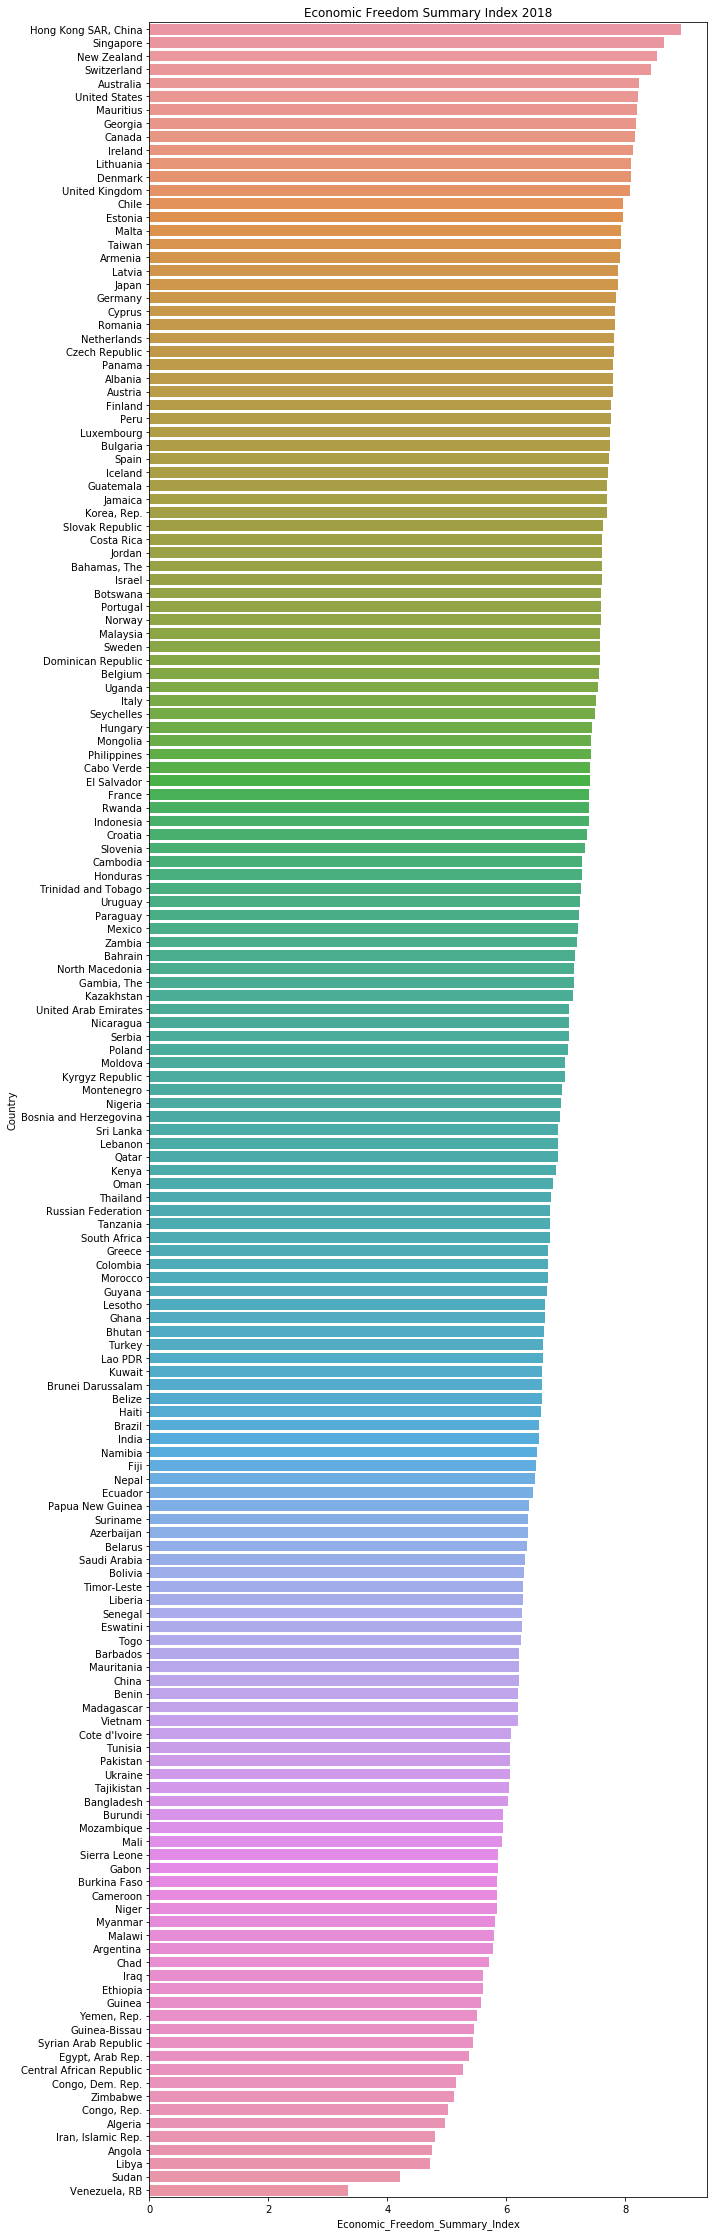

In [22]:
EFSI_by_country = combined_data[combined_data['Year'] == 2018][['Country', 'Economic_Freedom_Summary_Index']]
EFSI_by_country = EFSI_by_country.sort_values(by = ['Economic_Freedom_Summary_Index'], ascending = False)

plt.figure(figsize=(10,40))
chart = sns.barplot(y=EFSI_by_country['Country'], x=EFSI_by_country['Economic_Freedom_Summary_Index'])
chart.set_yticklabels(chart.get_yticklabels())
plt.title('Economic Freedom Summary Index 2018')
plt.show()

- Summarizing this graphic, China, Singapore, and New Zealand are among the top 3 in EFSI of 2018 while Libya, Sudan, and Venezuela are among the bottom 3. We (the United States) are ranked 6th.

### Pair scatterplots between all features and GDP per capita

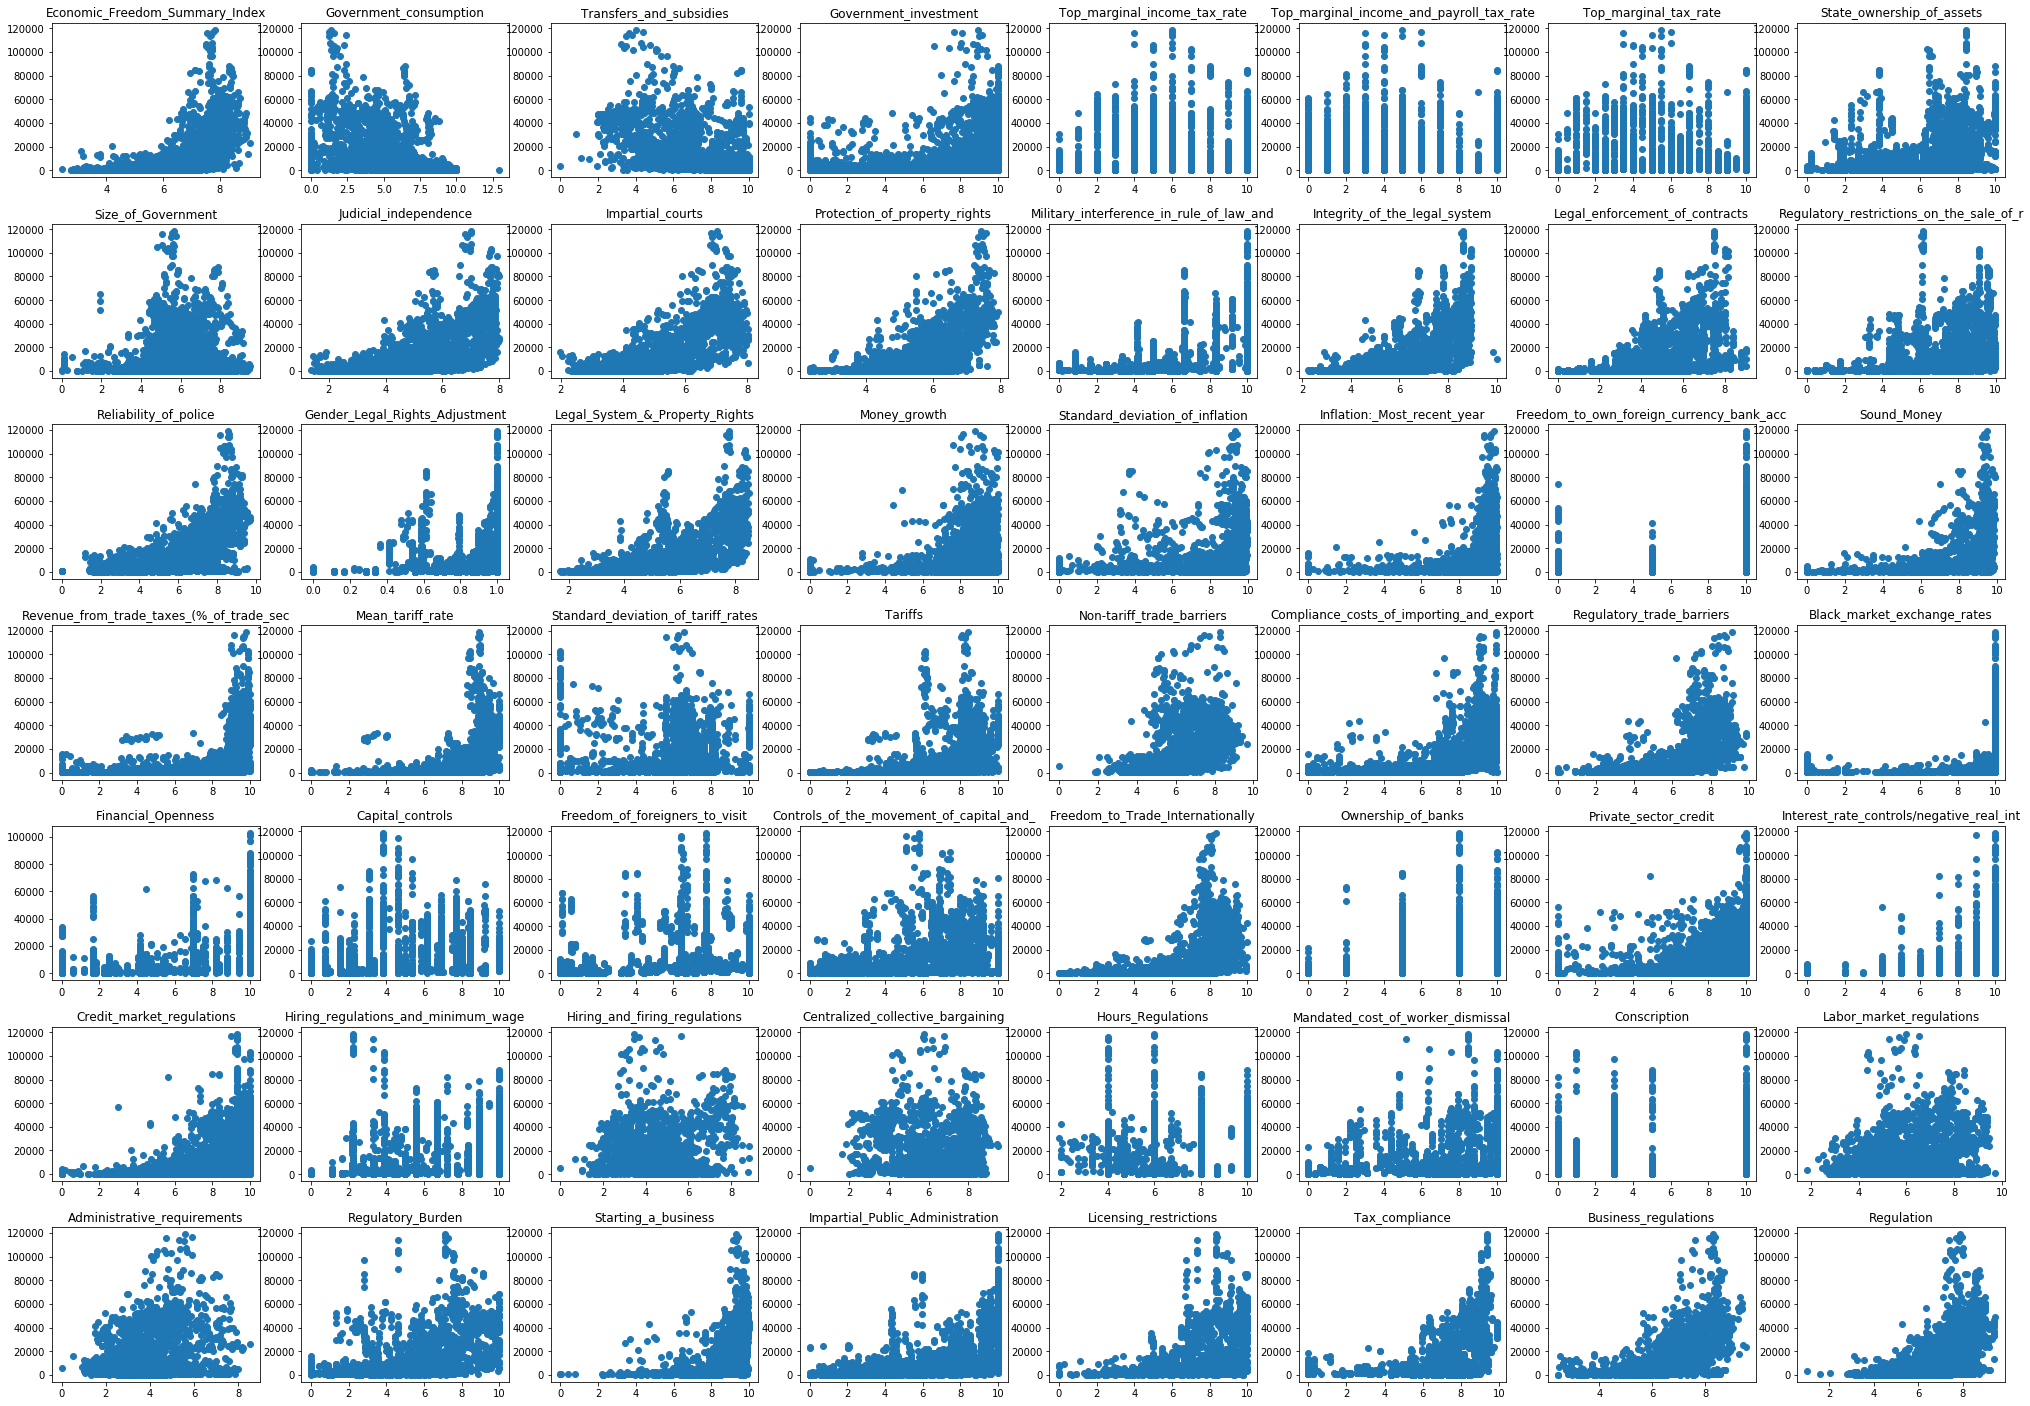

In [23]:
# Plot every single inidividual data point against `GDPpc`

fig, axs = plt.subplots(7, 8, figsize=(35, 25))

data_points = combined_data.drop(['Year', 'ISO_Code', 'Country', 'GDPpc'], axis=1)

row = -1
for i in range(len(data_points.columns)):
    if i % 8 == 0:
        row += 1
    
    # We drop the rows that have NaN only for the columns we are plotting
    dropna_df = combined_data.dropna(subset=['GDPpc', data_points.columns[i]])
    x = dropna_df[data_points.columns[i]].values
    y = dropna_df['GDPpc'].values
    axs[row, i%8].scatter(x, y)
    axs[row, i%8].set_title(data_points.columns[i][:40])
    
fig.subplots_adjust(hspace=0.3)

- In this graphic, several pair plots appear to have a non-linear relationship such as GDP per capita vs `Reliability_of_police`, `Mean_tariff_rate`, and `Starting_a_business`, for example. These plots appear to have an somewhat exponential relationship. Therefore, we may need to consider standardizing or linearly transforming our data.

### Temporal persepective of GDP pc vs. Economic Freedom Factors

- Since there are too many countries to plot, so we have selected 3 from across the EFSI spectrum from low, medium, to high GDP pc in order to visualize generally for a variety of countries: USA, Poland, and Venezuela

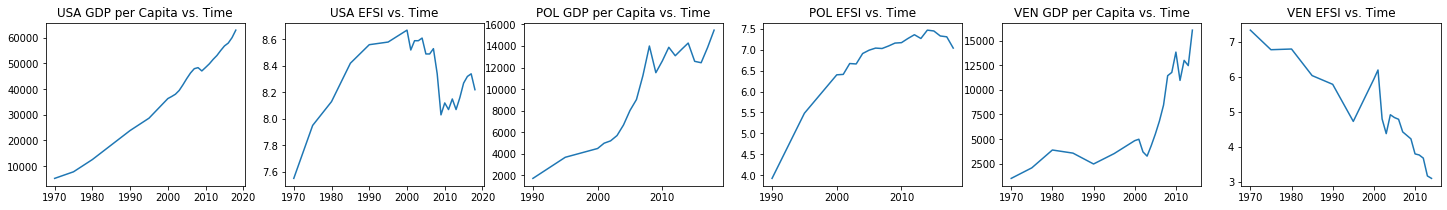

In [24]:
country_codes = ['USA', 'POL', 'VEN']

fig, axs = plt.subplots(1, len(country_codes) * 2, figsize=(25, 3))

col = 0
for country in country_codes:
    country_data = combined_data[combined_data['ISO_Code'] == country]
    country_data = country_data.dropna(subset=['Economic_Freedom_Summary_Index', 'GDPpc'])
    y1 = country_data['Economic_Freedom_Summary_Index'].values
    y2 = country_data['GDPpc'].values
    x = country_data['Year'].values
    axs[col].plot(x, y2)
    axs[col + 1].plot(x, y1)
    axs[col].set_title(country + " GDP per Capita vs. Time")
    axs[col + 1].set_title(country + " EFSI vs. Time")
   
    col += 2

Here, we will compare countries' GDP per capital to their EFSI over time. Since there are far too many countries to plot, we will yet again choose a small subsample of random countries to visualize: USA, POL, VEN, CHN, BTN, and FRA. Using these countries, we will compare their GDP per capital to their EFSI over time

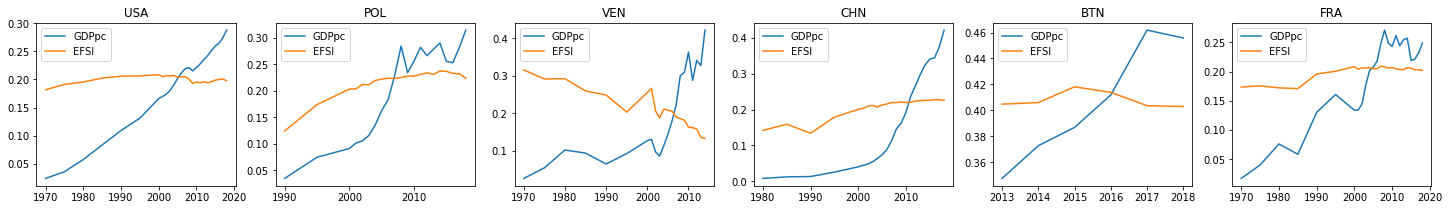

In [25]:
country_codes = ['USA', 'POL', 'VEN', 'CHN', 'BTN', 'FRA']

fig, axs = plt.subplots(1, len(country_codes), figsize=(25, 3))

col = 0
for country in country_codes:
    country_data = combined_data[combined_data['ISO_Code'] == country]
    country_data = country_data.dropna(subset=['Economic_Freedom_Summary_Index', 'GDPpc'])
    
    y1 = country_data['Economic_Freedom_Summary_Index'].values
    y1norm = np.linalg.norm(y1)
    y1 = y1/y1norm
    y2 = country_data['GDPpc'].values
    y2norm = np.linalg.norm(y2)
    y2 = y2/y2norm
    x = country_data['Year'].values
    
    axs[col].plot(x, y2)
    axs[col].plot(x, y1)
    axs[col].legend(['GDPpc', 'EFSI'])
    axs[col].set_title(country)
   
    col += 1

- We cannot clearly see a relationship between EFSI and GDP per capita over time, and therefore, may want to look to other more correlated features

In [26]:
efr_by_year = {}
for year in range(2000, 2019):
    efr_by_year[year] = efr[efr['Year'] == year][['Economic_Freedom_Summary_Index', 'ISO_Code']].sort_values('ISO_Code')
    efr_by_year[year] = efr_by_year[year].rename(columns = {'Economic_Freedom_Summary_Index' : str(year)})
    efr_by_year[year] = efr_by_year[year].transpose().fillna(0)
    ISO_Codes = efr_by_year[year].iloc[1]
    efr_by_year[year] = efr_by_year[year].rename(columns = ISO_Codes)
    efr_by_year[year] = efr_by_year[year].drop('ISO_Code', axis = 0)

In [27]:
transposed = pd.DataFrame()
for year in range(2000, 2019):
    transposed = transposed.append(efr_by_year[year])
    
transposed.head()

,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CHE,CHL,CHN,CIV,CMR,COD,COG,COL,CPV,CRI,CYP,CZE,DEU,DNK,DOM,DZA,ECU,EGY,ESP,EST,ETH,FIN,FJI,FRA,GAB,GBR,GEO,GHA,GIN,GMB,GNB,GRC,GTM,GUY,HKG,HND,HRV,HTI,HUN,IDN,IND,IRL,IRN,IRQ,ISL,ISR,ITA,JAM,JOR,JPN,KAZ,KEN,KGZ,KHM,KOR,KWT,LAO,LBN,LBR,LBY,LKA,LSO,LTU,LUX,LVA,MAR,MDA,MDG,MEX,MKD,MLI,MLT,MMR,MNE,MNG,MOZ,MRT,MUS,MWI,MYS,NAM,NER,NGA,NIC,NLD,NOR,NPL,NZL,OMN,PAK,PAN,PER,PHL,PNG,POL,PRT,PRY,QAT,ROU,RUS,RWA,SAU,SDN,SEN,SGP,SLE,SLV,SRB,SUR,SVK,SVN,SWE,SWZ,SYC,SYR,TCD,TGO,THA,TJK,TLS,TTO,TUN,TUR,TWN,TZA,UGA,UKR,URY,USA,VEN,VNM,YEM,ZAF,ZMB,ZWE
2000,0,6.66,7.22,7.3,0,8.12,8.02,0,5.38,7.84,5.84,0,5.94,5.73,7.22,6.73,0,0,5.83,7,5.92,6.36,0,0,7.38,5.13,8.27,8.75,7.44,5.52,5.86,5.39,3.8,4.75,5.89,0,7.6,6.5,6.98,7.96,8.08,6.67,4.87,5.7,6.4,7.89,7.79,0,8.03,6.85,7.64,5.64,8.52,6.97,5.8,0,0,4.57,7.33,6.9,6.55,8.76,6.83,6.24,6.93,7.01,6.02,6.27,8.12,5.7,0,7.94,6.72,7.75,7.43,7.14,8.05,0,6.66,0,0,7.08,6.74,0,0,0,0,6.47,0,7.14,8.15,7.59,5.93,0,5.82,6.63,0,5.95,6.85,3.68,0,0,0,0,7.31,5.12,6.49,6.42,5.35,4.95,7.14,8.03,7.77,6.02,8.4,7.04,5.3,7.65,7.45,7.08,5.86,6.4,7.65,7.01,0,5.48,5.23,6.22,0,0,5.73,8.46,4.98,7.81,0,0,6.9,6.67,7.86,0,0,4.87,5.93,5.66,6.5,0,0,7.3,6.39,5.58,7.53,6.31,7.09,4.88,7.18,8.67,5.93,5.56,0,6.87,7.13,4.24
2001,0,6.75,7.19,6.8,0,8.04,7.9,0,5.65,7.57,5.88,0,5.84,6.33,7.06,6.84,0,0,5.63,6.84,5.95,6.18,0,0,7.23,5.35,8.2,8.63,7.66,5.59,5.91,5.52,3.72,4.99,6.04,0,7.5,6.55,7.2,7.83,7.92,6.85,4.92,5.67,6.33,7.83,7.89,0,7.97,6.73,7.48,5.6,8.42,0,5.9,0,0,5.12,7.21,7.12,6.34,8.78,6.87,6.25,6.86,7.49,5.78,6.21,8.01,6.09,0,7.87,6.84,7.66,7.28,7.04,7.87,0,6.7,0,0,7.3,7.1,0,0,0,0,6.32,0,7.3,8.18,7.71,5.91,0,6.19,6.62,0,5.66,6.86,3.74,0,0,0,0,7.21,5.4,6.09,6.27,5.06,5,6.97,7.85,7.71,6.31,8.27,7.09,5.5,7.71,7.65,7.03,5.88,6.41,7.52,7.09,0,5.75,5.29,6.34,0,0,5.65,8.43,4.91,7.67,0,0,6.88,6.9,7.67,0,0,5.17,5.78,5.72,6.52,0,0,7.27,6.42,5.54,7.47,6.33,7.09,5.18,7.15,8.52,6.19,0,0,6.85,7.15,3.71
2002,0,6.94,7.38,6.3,0,8.07,7.94,0,5.59,7.76,6.15,0,5.88,6.77,7,6.83,0,0,5.95,6.76,6.31,6.24,0,0,7.2,5.23,8.28,8.76,7.71,5.76,5.68,5.57,4.5,4.85,6.16,0,7.46,6.97,7.3,7.88,7.99,6.79,4.79,6.23,6.01,7.85,7.92,0,7.98,6.83,7.56,5.57,8.47,0,6.14,0,0,5.19,7.37,7.25,6.39,8.67,7.08,6.25,6.75,7.26,6,6.28,8.06,5.94,0,7.88,7.14,7.71,7.37,7.13,7.85,0,6.69,0,0,7.36,7.09,0,0,0,0,6.41,0,7.68,7.95,7.82,5.86,0,5.96,6.71,0,5.43,6.73,3.26,0,0,0,0,7.24,5.42,6.18,6.39,5.14,5.45,7.34,7.86,7.66,6.43,8.32,7.12,5.74,7.71,7.73,7.13,5.9,6.67,7.62,6.97,0,6.41,5.71,6.5,0,0,5.74,8.59,5.23,7.55,0,0,6.95,6.93,7.75,0,0,5.02,5.89,5.9,6.61,0,0,7.3,6.22,5.79,7.59,6.2,7.01,5.66,7.3,8.59,4.79,0,0,6.8,6.84,3.66
2003,0,7.47,7.31,6.24,0,8.09,8.04,0,5.25,7.77,6.18,0,5.87,7.03,7.09,6.84,0,0,6.03,6.67,6.11,6.14,0,0,7.16,5.42,8.31,8.66,7.85,5.82,5.77,5.63,4.94,5.06,6.23,0,7.57,6.95,7.22,7.94,8.06,6.36,4.93,6.24,5.86,7.97,8.06,0,7.97,6.81,7.55,5.52,8.46,7.6,6.39,0,0,5.24,7.38,7.3,6.32,8.66,7.07,6.34,6.79,7.38,6.24,6.38,8.14,6,0,8.04,7.21,7.62,7.45,7.1,8.03,0,6.67,0,0,7.36,7.17,0,0,0,0,6.5,0,7.67,7.95,7.77,5.96,0,6.07,6.71,6.54,5.69,6.41,3.23,0,0,5.51,0,7.18,5.29,6.23,6.43,5.51,5.52,7.36,7.88,7.75,6.47,8.41,7.24,5.69,7.73,7.7,7.19,5.82,6.66,7.6,6.93,0,6.54,5.77,6.47,0,0,5.69,8.57,5.27,7.63,0,0,7.05,7.07,7.75,0,0,4.98,5.77,5.89,6.71,0,0,7.23,6.22,6.08,7.59,6.28,6.95,5.59,7.09,8.59,4.37,5.49,0,6.82,7.06,3.66
2004,0,7.24,7.32,6.3,7.76,8.04,7.99,6.27,5.14,7.74,6,0,5.77,7.01,7.01,6.9,0,0,6.87,6.63,6.27,6.25,0,0,7.27,5.2,8.35,8.61,7.85,5.7,5.81,5.69,4.69,4.92,6.38,0,7.42,7.66,7.37,7.9,8.1,5.9,5.04,5.95,6.05,8,8.14,0,7.99,6.99,7.58,5.74,8.37,7.61,6.29,0,0,5.18,7.4,7.44,6.15,8.71,7.08,6.36,6.85,7.52,6.23,6.33,8.18,6.01,0,8.09,7.24,7.67,7.5,7.17,8.01,0,6.8,0,0,7.45,6.95,0,0,0,0,6.37,0,7.68,7.94,7.82,5.96,0,5.84,6.86,6.55,5.53,7.21,3.44,0,7.11,5.74,0,7.24,5.13,6.26,6.4,5.13,5.65,7.28,7.89,7.66,6.43,8.41,7.01,5.68,7.78,7.72,7,5.94,6.91,7.63,6.93,0,6.7,6.11,6.05,0,0,5.69,8.6,5.33,7.72,0,0,7.64,7.09,7.75,0,0,5

`transposed` is a dataframe containing every country's economic freedom ranking (efr) from 2000 through 2018. This dataframe is used to graph every country's efr over time before being divided up by continent.

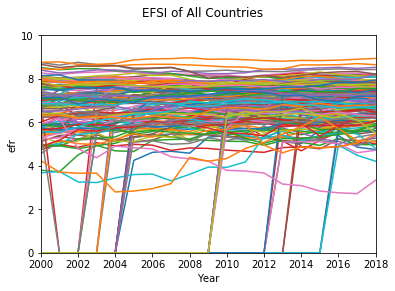

In [28]:
years = list(range(2000, 2019)) #2000 - 2018

# Title & axes labels
plt.suptitle('EFSI of All Countries') # Centered title to figure
plt.xlabel('Year')
plt.ylabel('efr')

plt.axis([2000, 2018, 0, 10])

# Graphing every country's economic freedom rating (efr) between 2000 and 2018
    # It's so ugly, should split the countries up by continent
for index in range(0, 162):
    plt.plot(years, transposed.iloc[: , index])

### Splitting By Continent
* https://datahub.io/JohnSnowLabs/country-and-continent-codes-list
    - The above link directs to a csv containing location information about each country, which is used to separate the countries contained in tranposed by continent.

In [29]:
places = pd.read_csv('data/Country_and_Continent_Info.csv')
# places.head()

In [30]:
# Represented continents/land masses
places['Continent_Name'].unique()

array(['Asia', 'Europe', 'Antarctica', 'Africa', 'Oceania',
       'North America', 'South America'], dtype=object)

In [31]:
# Countries, their ISO codes, and more, divided by continent
AsiaInfo = places[places['Continent_Name'] == 'Asia']
EuropeInfo = places[places['Continent_Name'] == 'Europe']
AntarcticaInfo = places[places['Continent_Name'] == 'Antarctica']
AfricaInfo = places[places['Continent_Name'] == 'Africa']
OceaniaInfo = places[places['Continent_Name'] == 'Oceania']
NorthAmericaInfo = places[places['Continent_Name'] == 'North America']
SouthAmericaInfo = places[places['Continent_Name'] == 'South America']

In [32]:
Asia_3LetterCodes = AsiaInfo['Three_Letter_Country_Code'].tolist()
Europe_3LetterCodes = EuropeInfo['Three_Letter_Country_Code'].tolist()
Antarctica_3LetterCodes = AntarcticaInfo['Three_Letter_Country_Code'].tolist()
Africa_3LetterCodes = AfricaInfo['Three_Letter_Country_Code'].tolist()
Oceania_3LetterCodes = OceaniaInfo['Three_Letter_Country_Code'].tolist()
NorthAmerica_3LetterCodes = NorthAmericaInfo['Three_Letter_Country_Code'].tolist()
SouthAmerica_3LetterCodes = SouthAmericaInfo['Three_Letter_Country_Code'].tolist()

In [33]:
countryCodes = transposed.columns
countryCodes

Index(['AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       ...
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', length=162)

In [34]:
# Country lists to populate
asianCountries = []
europeCountries = []
antarcticaCountries = []
africaCountries = []
oceaniaCountries = []
northamericaCountries = []
southamericaCountries = []

# Populating the lists
for code in countryCodes:
    if code in Asia_3LetterCodes:
        asianCountries.append(code)
        
    elif code in Europe_3LetterCodes:
        europeCountries.append(code)
    
    elif code in Antarctica_3LetterCodes:
        antarcticaCountries.append(code)
        
    elif code in Africa_3LetterCodes:
        africaCountries.append(code)
        
    elif code in Oceania_3LetterCodes:
        oceaniaCountries.append(code)
        
    elif code in NorthAmerica_3LetterCodes:
        northamericaCountries.append(code)
        
    elif code in SouthAmerica_3LetterCodes:
        southamericaCountries.append(code)

# The lists
transposedAsia = transposed[asianCountries] #19 years, 45 countries (transposed is 19 years, 162 countries)
transposedEurope = transposed[europeCountries] # 38
transposedAntarctica = transposed[antarcticaCountries]
transposedAfrica = transposed[africaCountries] # 47
transposedOceania = transposed[oceaniaCountries] # 4
transposedNorthAmerica = transposed[northamericaCountries] # 16
transposedSouthAmerica = transposed[southamericaCountries] # 12

* The below graphs are less crowded versions of the graph with every country's economic freedom ranking (efr) over time. It is interesting however to note that most countries' efr remain between 6 and 8 over time.
    - NOTE: Not all countries received an efr for 2000, which explains why several countries' lines suddenly shoot upwards.

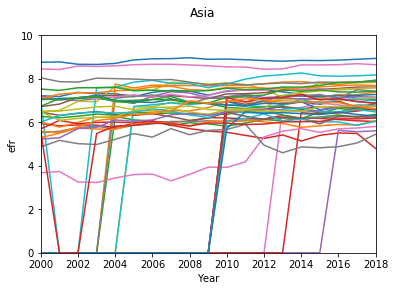

In [35]:
years = list(range(2000, 2019)) #2000 - 2018

# Title & axes labels
plt.suptitle('Asia') # Centered title to figure
plt.xlabel('Year')
plt.ylabel('efr')

plt.axis([2000, 2018, 0, 10])

# Graphing only the Asian countries' economic freedom rating (efr) between 2000 and 2018
for index in range(0, 44):
    plt.plot(years, transposedAsia.iloc[: , index])

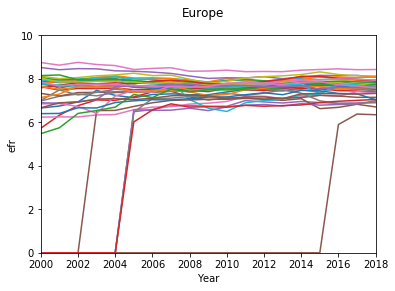

In [36]:
years = list(range(2000, 2019)) #2000 - 2018

# Title & axes labels
plt.suptitle('Europe') # Centered title to figure
plt.xlabel('Year')
plt.ylabel('efr')

plt.axis([2000, 2018, 0, 10])

for index in range(0, 37):
    plt.plot(years, transposedEurope.iloc[: , index])

# 4. Analysis

* We will look further into the data and their relationships by:
    - Looking at each feature's relationship with GDPpc through a **correlation matrix**
    - Training and optimizing a linear regression model from `sklearn`

### Finding correlated features to GDP per capita

In [55]:
cor_mat_df = cleaned.copy()
cor_mat_df.head()

,Year,ISO_Code,Country,Economic_Freedom_Summary_Index,Government_consumption,Transfers_and_subsidies,Government_investment,Top_marginal_income_tax_rate,Top_marginal_income_and_payroll_tax_rate,Top_marginal_tax_rate,State_ownership_of_assets,Size_of_Government,Judicial_independence,Impartial_courts,Protection_of_property_rights,Military_interference_in_rule_of_law_and_politics,Integrity_of_the_legal_system,Legal_enforcement_of_contracts,Regulatory_restrictions_on_the_sale_of_real_property,Reliability_of_police,Gender_Legal_Rights_Adjustment,Legal_System_&_Property_Rights,Money_growth,Standard_deviation_of_inflation,Inflation:_Most_recent_year,Freedom_to_own_foreign_currency_bank_accounts,Sound_Money,Revenue_from_trade_taxes_(%_of_trade_sector),Mean_tariff_rate,Standard_deviation_of_tariff_rates,Tariffs,Non-tariff_trade_barriers,Compliance_costs_of_importing_and_exporting,Regulatory_trade_barriers,Black_market_exchange_rates,Financial_Openness,Capital_controls,Freedom_of_foreigners_to_visit,Controls_of_the_movement_of_capital_and_people,Freedom_to_Trade_Internationally,Ownership_of_banks,Private_sector_credit,Interest_rate_controls/negative_real_interest_rates),Credit_market_regulations,Hiring_regulations_and_minimum_wage,Hiring_and_firing_regulations,Centralized_collective_bargaining,Hours_Regulations,Mandated_cost_of_worker_dismissal,Conscription,Labor_market_regulations,Administrative_requirements,Regulatory_Burden,Starting_a_business,Impartial_Public_Administration,Licensing_restrictions,Tax_compliance,Business_regulations,Regulation,GDPpc
0,2018.0,ALB,Albania,7.80,8.155882,6.738420,7.995416,9.0,7.0,8.0,9.538,8.085544,3.564791,3.651625,4.935262,8.3,5.707933,3.913506,6.715384,5.607842,0.9524,5.173414,9.957235,9.738327,9.594400,10.0,9.822491,9.666667,9.28,8.0992,9.015289,6.807307,9.405328,8.106317,10.0,4.164419,4.615385,8.296923,5.692242,8.203462,10.0,9.214878,10.0,9.738293,5.566667,4.865385,5.575783,8.0,6.299741,10.0,6.717929,5.651538,6.666667,9.742477,5.396,5.621940,7.175250,6.708979,7.721734,5284.380184
1,2018.0,DZA,Algeria,4.97,3.220588,7.817129,4.606816,7.0,2.0,4.5,1.064,4.241707,3.710710,4.108493,5.487307,4.2,4.694287,4.392092,6.626692,6.347414,0.8333,4.533636,9.596447,7.944070,9.146020,5.0,7.921634,8.480000,6.22,5.9176,6.872533,4.557608,0.479290,2.518449,0.0,1.657258,0.000000,1.106256,0.921172,2.578038,0.0,5.301526,10.0,5.100509,5.566667,5.028064,6.522477,6.0,7.755176,3.0,5.645397,4.215154,2.444444,9.305002,3.906,8.771111,7.029528,5.945207,5.563704,4153.733978
2,2018.0,AGO,Angola,4.75,7.698695,9.623978,6.326667,10.0,9.0,9.5,3.376,7.305068,3.167767,3.218124,4.174422,3.3,4.867423,2.302200,5.521625,3.806231,0.8095,3.433276,9.873492,2.980998,5.961926,0.0,4.704104,9.240000,8.16,4.4064,7.268800,4.695111,2.514793,3.604952,0.0,0.000000,2.307692,0.110626,0.806106,2.919964,5.0,6.533000,4.0,5.177667,10.000000,4.426570,6.969783,4.0,6.632764,0.0,5.338186,2.937894,2.444444,8.730805,5.044,7.916416,6.782923,5.642747,5.386200,3289.646664
3,2018.0,ARG,Argentina,5.78,5.938235,6.307902,7.586454,7.0,1.0,4.0,6.408,6.048118,4.268820,4.256857,5.633630,7.5,4.784467,3.816436,6.857195,4.411544,0.7857,4.634890,5.667184,6.453117,3.140000,5.0,5.065075,7.106667,7.28,5.9200,6.768889,5.070688,5.649711,5.360200,10.0,7.595233,6.923077,7.965046,7.494452,7.405885,5.0,4.259461,8.0,5.753154,2.766667,2.240387,3.192984,10.0,2.517254,10.0,5.119549,2.714233,6.666667,9.579288,7.202,5.726521,6.508295,6.399500,5.757401,11633.498010
4,2018.0,ARM,Armenia,7.92,7.717647,7.711172,9.296599,5.0,5.0,5.0,9.510,7.847084,4.014064,4.886363,6.024881,5.8,5.449060,5.196693,9.815935,6.669861,1.0000,5.982107,9.110175,9.617362,9.495953,10.0,9.555873,9.026667,8.70,7.5820,8.436222,5.689747,9.315389,7.502568,10.0,8.342742,5.384615,10.000000,7.909119,8.461977,10.0,8.639931,10.0,9.546644,6.666667,5.599639,7.248644,10.0,9.251725,0.0,6.461113,5.170406,6.000000,9.863530,6.298,9.302574,7.040738,7.279208,7.762321,4220.490277


In [38]:
# We should omit columns that are not freedom factors

cor_mat_df = cor_mat_df.drop(['Year', 'ISO_Code', 'Country'], axis=1)

In [39]:
# Use correlation matrix, then only get those correlated with `GDPpc`, and sort data

sorted_cors = cor_mat_df.corr()['GDPpc'].sort_values(ascending=False)
sorted_cors.head(10)

GDPpc                              1.000000
Impartial_courts                   0.776404
Legal_System_&_Property_Rights     0.732106
Protection_of_property_rights      0.714242
Integrity_of_the_legal_system      0.698482
Judicial_independence              0.695443
Reliability_of_police              0.641646
Business_regulations               0.615366
Impartial_Public_Administration    0.613902
Regulatory_Burden                  0.552970
Name: GDPpc, dtype: float64

In [40]:
# Most positively correlated
sorted_cors[1:11]

Impartial_courts                   0.776404
Legal_System_&_Property_Rights     0.732106
Protection_of_property_rights      0.714242
Integrity_of_the_legal_system      0.698482
Judicial_independence              0.695443
Reliability_of_police              0.641646
Business_regulations               0.615366
Impartial_Public_Administration    0.613902
Regulatory_Burden                  0.552970
Legal_enforcement_of_contracts     0.548626
Name: GDPpc, dtype: float64

In [41]:
# Most negatively correlated
sorted_cors[-5:]

Top_marginal_tax_rate          -0.200098
Size_of_Government             -0.200788
Top_marginal_income_tax_rate   -0.256590
Government_consumption         -0.508678
Transfers_and_subsidies        -0.536943
Name: GDPpc, dtype: float64

In [42]:
# Getting names of those features most positively correlated with GDP pc for our linear model

most_correlated_names = sorted_cors[1:11].index.values

### Baseline machine learning model

We will first examine the model trained with the top 10 most correlated factors. We will use this as our baseline for our more optimized models. As stated before, we will use `sklearn`'s `LinearRegression` model.

In [43]:
# Split data into features and labels
X = cor_mat_df.loc[:, most_correlated_names]
y = cor_mat_df.loc[:, 'GDPpc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42069)
X_train.head()

,Impartial_courts,Legal_System_&_Property_Rights,Protection_of_property_rights,Integrity_of_the_legal_system,Judicial_independence,Reliability_of_police,Business_regulations,Impartial_Public_Administration,Regulatory_Burden,Legal_enforcement_of_contracts
940,3.513086,4.277766,4.672825,5.708686,3.704775,3.992475,5.926000,5.266,2.444444,6.091653
714,7.000518,7.901536,6.820935,8.639661,7.189467,8.548716,8.405679,9.616,7.777778,6.262500
797,4.698745,5.207896,5.945869,7.384328,4.514649,5.140627,6.951506,5.416,5.111111,4.816000
1011,5.989422,6.114875,6.198735,7.883005,6.144368,6.302549,7.460356,8.242,8.444444,4.626758
334,3.726836,3.204295,4.887425,4.381962,3.584525,3.754961,4.998116,2.702,2.666667,0.941148


In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# This is our baseline score

baseline_score = mean_squared_error(y_test, model.predict(X_test)) ** 0.5
baseline_score

10073.339690549712

### Optimized machine learning model 

For our optimized model, we want to see which factors out of the top 10 are most important. We can do this by finding all possible combinations of freedom factors, then training a model with them. In other words, we are finding all possible subsets of our top 10 factors. This procedure is taken from a **subset algorithm** methodology.

In [46]:
# Get the names(strings) of the most correlated factors
selected_names = most_correlated_names[:10].tolist()

# Define function to find all possible subsets
def subsets(names):
    output = [[]]

    for name in names:
        output += [curr + [name] for curr in output]
    
    return output

names_subsets = subsets(selected_names)
names_subsets[:5]

[[],
 ['Impartial_courts'],
 ['Legal_System_&_Property_Rights'],
 ['Impartial_courts', 'Legal_System_&_Property_Rights'],
 ['Protection_of_property_rights']]

In [47]:
# Remove empty set
names_subsets = names_subsets[1:]

In [48]:
# Split into features and labels again. We want to keep the same split for all models
X = cor_mat_df[selected_names]
y = cor_mat_df.loc[:, 'GDPpc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42069)

results = []
best_feats = []
best_model = None
best_score = float('inf')

# Loop through each possible combination and train the model
for subset in names_subsets:
    # Use only the columns of the current subset
    X_train_curr = X_train[subset]
    X_test_curr = X_test[subset]

    model = LinearRegression()
    model.fit(X_train_curr, y_train)
    score = mean_squared_error(y_test, model.predict(X_test_curr)) ** 0.5

    if score < best_score:
        best_score = score
        best_model = model
        best_feats = subset

    results.append((score, subset))

In [49]:
# These are the factors in our best model
best_feats

['Impartial_courts',
 'Legal_System_&_Property_Rights',
 'Integrity_of_the_legal_system',
 'Reliability_of_police',
 'Business_regulations',
 'Legal_enforcement_of_contracts']

In [50]:
# Here are the scores and factors of our top 5 models
sorted(results, reverse = True)[:5]

[(15045.211167011163, ['Regulatory_Burden']),
 (14864.63255794022, ['Legal_enforcement_of_contracts']),
 (14226.04890292311, ['Business_regulations']),
 (14169.152887081185, ['Business_regulations', 'Regulatory_Burden']),
 (13981.98567491815, ['Regulatory_Burden', 'Legal_enforcement_of_contracts'])]

### Performance Evaluation

In [51]:
print("Optimized Score vs. Baseline Score:")
print(str(best_score)[:6] + " < " + str(baseline_score)[:6] + " = " + str(best_score < baseline_score))

Optimized Score vs. Baseline Score:
9993.9 < 10073. = True


- To reiterate, our baseline model has a performance of **10073.3 RMSE** while our optimized model has a performance of **9993.9 RMSE**. 

# 5. Conclusion and Discussion
Our research was aimed at finding economic freedom factors that influence the country’s economic productivity. We did this by analyzing many different freedom factors against a country’s GDP per capita. Our analysis found that from our 10 most strongly correlated features with GDP per capita, the 5 following freedom factors produce the best linear regression model:

1. Impartial courts
2. Integrity of the legal system
3. Reliability of police
4. Business regulations
5. Legal enforcement of contracts

with a optimized model performance of **9993.9 RMSE** and a baseline model performance of **10073.3 RMSE**. These exceptionally high RMSE's may be due to the naturally large values that GDP per capita has (e.g., 62996.47 for the United States in 2018). On a related note, there is also a high variability in GDP per capita between countries; for example, in 2018 the United States had a GDP per capita of 62996.47 whereas Argentina had a GDP of 11633.50. Overall in retrospect, the model can be improved by performing better data cleaning/pre-processing or even choosing a different machine learning approach (e.g., principal component analysis to combat the high number of features). 

### Limitations:

Firstly, our final linear regression model produces an RMSE of 10073.3 which is *incredibly* high. This indicates that our general procedure may need improvement before practically using our model in the real world. Not only that, but our original dataset had large amounts of null values which were also very tricky to imput. Furthermore, the concept of predicting a country's gross domestic product per capita may not be the most useful concept. *Once we predict a country's GDP per capita, so what?*

Though it is difficult to determine whether economic freedomic factors are potentially confounded due to the size of the data, this set of five factors seems reasonable as key components to a country's GDP. If more time were allotted, a potential way to expand on this project would be to target specific groups of factors and trace them to a single confounding variable each. This would allow us to get more accurate results. In particular, from these 5 factors, `legal_enforcement_of_contracts` and `integrity_of_the_legal_system` seem like they would be confounded to some degree.  

Though "police" and "courts" may seem logically disconnected from GDP, it can be further understood when considered in comparisons versus lesser developed countries; rather than thinking about how a country's GDP is marginally increased by having better police and more impartial courts, it is more critical to consider how severely a country's GDP could be decreased by having unreliable police and biased courts. In this way, it seems logical to say that both police and courts are key components of GDP.

# Privacy/Ethics Considerations

There are no considerations to be made with regards to privacy, as all data used in this project are publicly available data regarding countries as a whole. No individuals are at risk due to our data usage, as all data is grouped and separated from any individual identification, barring the country of residence.  

Ethically, some important considerations must be made; in particular, regarding usage of the earlier discussed results. Concluding which factors are most important to GDP does not guarantee that focusing on these particular elements economically will create favorable outcomes to GDP, as the actual effect of such procedures would have to be individually researched and calculated in its own right. These results seem difficult to be used in a discriminatory fashion, considering that these factors and data are at the country level, meaning that misusage of these results would require large amounts of data on groups, which, excepting entire countries as groups, is extremely difficult to acquire. The analyses performed in this project were not intended to be used as professional insight, and any initiative using our results are not supported by the creators of this project.